In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def toggle_switch(t, y, params):
    """

    双稳态开关的微分方程模型
    输入:
        t: 时间（标量）
        y: 当前状态 [u, v]
        params: 参数列表 [alpha, beta, n]
    输出:
        [du/dt, dv/dt]
    """

    u, v = y
    alpha, beta, n = params

    
    du_dt = alpha / (1 + v**n) - u
    dv_dt = beta / (1 + u**n) - v

    
    return [du_dt, dv_dt]

In [3]:
# 参数设置
params = [5, 5, 4]  # alpha=5, beta=5, n=4



# 时间范围
t_span = (0, 50)
t_eval = np.linspace(0, 50, 500)  # 用于绘图的时间点



# 初始条件 1: 高 U, 低 V
initial1 = [4, 0]



# 初始条件 2: 低 U, 高 V
initial2 = [0, 4]




# 模拟第一次：高 U, 低 V

sol1 = solve_ivp(
    toggle_switch,

    t_span,
    initial1,
    args=(params,),

    t_eval=t_eval,
    method='RK45'

)




# 模拟第二次：低 U, 高 V

sol2 = solve_ivp(
    toggle_switch,

    t_span,
    initial2,
    args=(params,),

    t_eval=t_eval,
    method='RK45'

)

/var/folders/sl/vpbcdghd70x4slnzmtrg7yh80000gp/T/ipykernel_1698/1370466226.py:24: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/sl/vpbcdghd70x4slnzmtrg7yh80000gp/T/ipykernel_1698/1370466226.py:24: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/sl/vpbcdghd70x4slnzmtrg7yh80000gp/T/ipykernel_1698/1370466226.py:24: UserWarning: Glyph 21021 (\N{CJK UNIFIED IDEOGRAPH-521D}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/var/folders/sl/vpbcdghd70x4slnzmtrg7yh80000gp/T/ipykernel_1698/1370466226.py:24: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/Users/mading1/miniforge3/envs/homework/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39640 (\

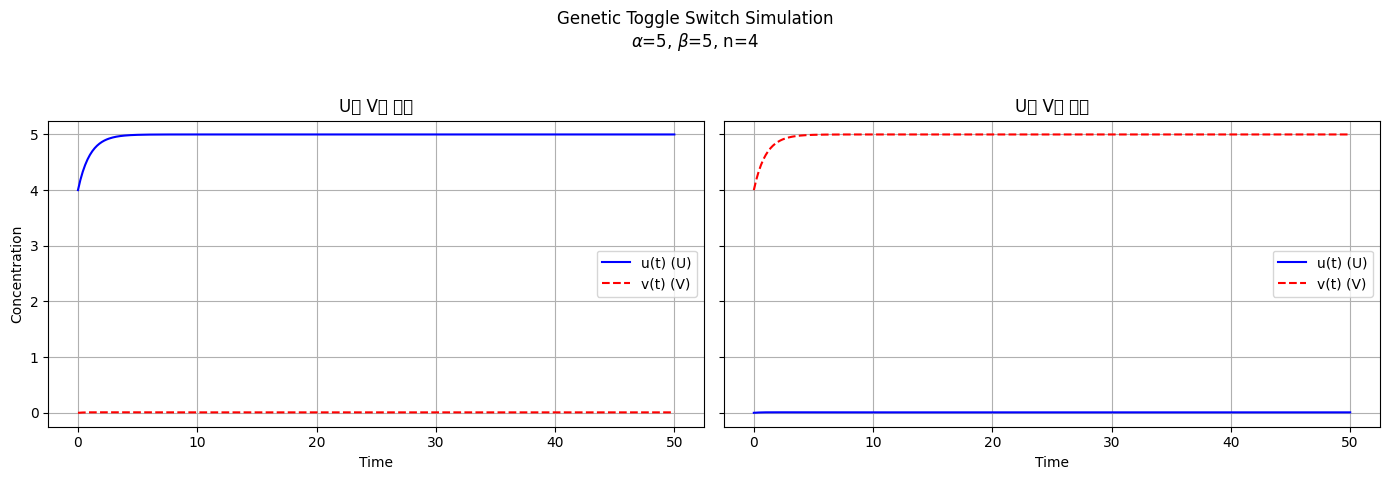

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)


# 第一个子图：U高V低初始
axes[0].plot(sol1.t, sol1.y[0], 'b-', label='u(t) (U)')
axes[0].plot(sol1.t, sol1.y[1], 'r--', label='v(t) (V)')
axes[0].set_title("U高 V低 初始")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Concentration")
axes[0].legend()
axes[0].grid(True)


# 第二个子图：U低V高初始
axes[1].plot(sol2.t, sol2.y[0], 'b-', label='u(t) (U)')
axes[1].plot(sol2.t, sol2.y[1], 'r--', label='v(t) (V)')
axes[1].set_title("U低 V高 初始")
axes[1].set_xlabel("Time")
axes[1].legend()
axes[1].grid(True)


plt.suptitle('Genetic Toggle Switch Simulation\n$\u03B1$=5, $\u03B2$=5, n=4')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 问题回答



1. **长期行为**：  


   模拟结果显示，系统最终会趋于两个稳定状态之一：

   - 当初始 `u` 较高时，`u` 保持高浓度，`v` 趋于低浓度；

   - 当初始 `v` 较高时，`v` 保持高浓度，`u` 趋于低浓度。  

   这表明系统具有“记忆”能力，其最终状态依赖于初始条件。



2. **为什么是“双稳态”？**  


   “双稳态”意味着系统有两个稳定的平衡点（fixed points），中间的不稳定状态会被排斥。在这个模型中，由于两个基因相互抑制，系统只能稳定在“U高V低”或“U低V高”两种状态之一，因此称为双稳态。



3. **ON/OFF 状态对应关系**：  

   - 稳定状态1（U高，V低）：基因 U 为 **ON**，基因 V 为 **OFF**  

   - 稳定状态2（U低，V高）：基因 U 为 **OFF**，基因 V 为 **ON**  


   这种切换可用于构建生物“开关”或“记忆单元”，是合成生物学中的核心设计。